In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/company_data.csv')
df['datadate'] = pd.to_datetime(df['datadate'], format='%Y-%m-%d')
df = df.fillna(0)
df = df.replace(np.nan,0)

In [3]:
df

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ivao,lct,lo,lt,mibn,ppent,pstk,teq,txditc,costat
0,1690,2010-09-30,2010,INDL,C,D,STD,AAPL,APPLE INC,USD,...,25391.0,20722.0,2370.0,27392.0,0.0,4768.0,0.0,47791.0,4300.0,A
1,1690,2011-09-30,2011,INDL,C,D,STD,AAPL,APPLE INC,USD,...,55618.0,27970.0,3627.0,39756.0,0.0,7777.0,0.0,76615.0,8159.0,A
2,1690,2012-09-30,2012,INDL,C,D,STD,AAPL,APPLE INC,USD,...,92122.0,38542.0,5465.0,57854.0,0.0,15452.0,0.0,118210.0,13847.0,A
3,1690,2013-09-30,2013,INDL,C,D,STD,AAPL,APPLE INC,USD,...,106215.0,43658.0,6344.0,83451.0,0.0,16597.0,0.0,123549.0,16489.0,A
4,1690,2014-09-30,2014,INDL,C,D,STD,AAPL,APPLE INC,USD,...,130162.0,63448.0,7598.0,120292.0,0.0,20624.0,0.0,111547.0,20259.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,20779,2018-07-31,2018,INDL,C,D,STD,CSCO,CISCO SYSTEMS INC,USD,...,5860.0,27035.0,18073.0,65580.0,0.0,3006.0,0.0,43204.0,141.0,A
218,20779,2019-07-31,2019,INDL,C,D,STD,CSCO,CISCO SYSTEMS INC,USD,...,6552.0,31712.0,17940.0,64222.0,0.0,2789.0,0.0,33571.0,95.0,A
219,20779,2020-07-31,2020,INDL,C,D,STD,CSCO,CISCO SYSTEMS INC,USD,...,6921.0,25331.0,19282.0,56933.0,0.0,3374.0,0.0,37920.0,81.0,A
220,20779,2021-07-31,2021,INDL,C,D,STD,CSCO,CISCO SYSTEMS INC,USD,...,6384.0,26257.0,19982.0,56222.0,0.0,3433.0,0.0,41275.0,134.0,A


In [4]:
# using a subset for the case of testing
df = df.loc[df['tic'].isin(['AAPL', 'VZ', 'BA', 'KO', 'XOM', 'MCD'])]

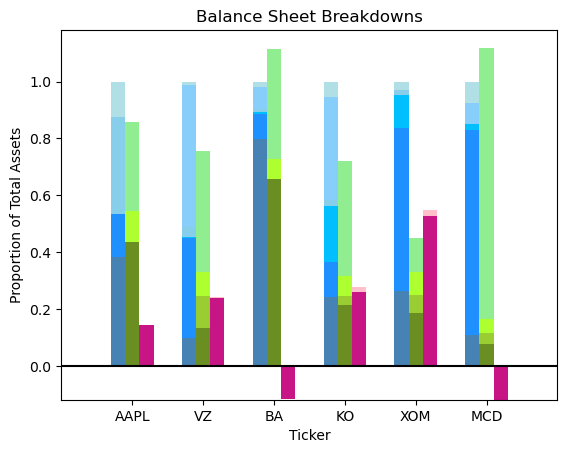

In [5]:
grouped = df.groupby('tic')
x = list(df.tic.unique())
x_axis = np.arange(len(x))
plt.xlim(min(x_axis)-1, max(x_axis)+1)

for tic, group in grouped:  
    # finding the last row for a given company and getting its position for graphing
    idx = x.index(tic)
    final = group.iloc[-1]
    
    # asset calc
    act = final['act'] / final['at']
    ppent = final['ppent'] / final['at']
    ivaeq = final['ivaeq'] / final['at']
    ivao = final['ivao'] / final['at']
    intan = final['intan'] / final['at']
    ao = final['ao'] / final['at']
    #print(act, ppent, ivaeq, ivao, intan, ao)
    
    # liability calc
    lct = final['lct'] / final['at']
    txditc = final['txditc'] / final['at']
    lo = final['lo'] / final['at']
    dltt = final['dltt'] / final['at']
    #print(lct,txditc,lo,dltt)
    
    # equity calc
    ceq = final['ceq'] / final['at']
    pstk = final['pstk'] / final['at']
    mibn = final['mibn'] / final['at']
    #print(ceq, pstk, mibn)
    
    act, ppent, ivaeq, ivao, intan, ao = [np.array(var) if var!=np.nan else np.array(0) for var in [act, ppent, ivaeq, ivao, intan, ao]]

    # assets graphing
    plt.bar(x_axis[idx]-0.2, act, 0.2, color='steelblue')
    plt.bar(x_axis[idx]-0.2, ppent, 0.2, bottom=act, color='dodgerblue')
    plt.bar(x_axis[idx]-0.2, ivaeq, 0.2, bottom=act+ppent, color='deepskyblue')
    plt.bar(x_axis[idx]-0.2, ivao, 0.2, bottom=act+ppent+ivaeq, color='skyblue')
    plt.bar(x_axis[idx]-0.2, intan, 0.2, bottom=act+ppent+ivaeq+ivao, color='lightskyblue')
    plt.bar(x_axis[idx]-0.2, ao, 0.2, bottom=act+ppent+ivaeq+ivao+intan, color='powderblue')

    # liabilities graphing
    plt.bar(x_axis[idx], lct, 0.2, color='olivedrab')
    plt.bar(x_axis[idx], txditc, 0.2, bottom=lct, color='yellowgreen')
    plt.bar(x_axis[idx], lo, 0.2, bottom=lct+txditc, color='greenyellow')
    plt.bar(x_axis[idx], dltt, 0.2, bottom=lct+txditc+lo, color='lightgreen')

    # equities graphing
    plt.bar(x_axis[idx]+0.2, ceq, 0.2, color='mediumvioletred')
    plt.bar(x_axis[idx]+0.2, pstk, 0.2, bottom=ceq, color='hotpink')
    plt.bar(x_axis[idx]+0.2, mibn, 0.2, bottom=ceq+pstk, color='pink')

# plotting basics 
plt.xticks(x_axis, x)
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.xlabel('Ticker')
plt.ylabel('Proportion of Total Assets')
plt.title('Balance Sheet Breakdowns')
plt.show()